In [1]:
from IPython.display import display

In [3]:
# example
df = pd.DataFrame({'C1': {'A': 5, 'B': 2, 'C': 3, 'D': 4},
                   'C2': {'A': 4, 'B': 1, 'C': 4, 'D': 2},
                   'C3': {'A': 3, 'B': 4, 'C': 6, 'D': 8}})

def quant_norm(df_input):
    df = df_input.copy()
    #compute rank
    dic = {}
    for col in df:
        dic.update({col : sorted(df[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in df:
        t = np.searchsorted(np.sort(df[col]), df[col])
        df[col] = [rank[i] for i in t]
    return df


display(df)
quant_norm_df = quant_norm(df)
display(quant_norm_df)

,C1,C2,C3
A,5,4,3
B,2,1,4
C,3,4,6
D,4,2,8


,C1,C2,C3
A,5.666667,4.666667,2.000000
B,2.000000,2.000000,3.000000
C,3.000000,4.666667,4.666667
D,4.666667,3.000000,5.666667


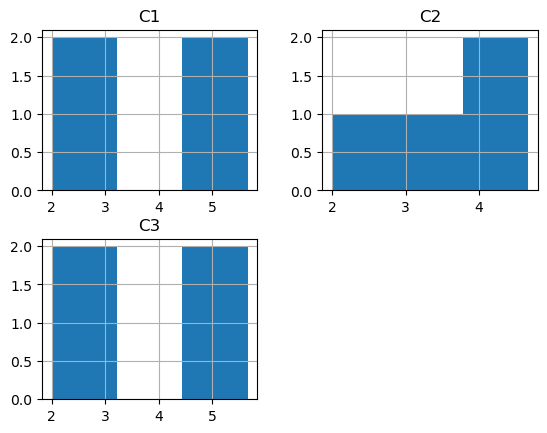

In [4]:
hist = quant_norm_df.hist(bins=3)

In [5]:
# Load the data from the file
file_path = "TIS_raw_input1.txt"
df = pd.read_csv(file_path, sep="\t")

display(df.iloc[:, 1:])
quant_norm_df = quant_norm(df.iloc[:, 1:])
display(quant_norm_df)

,expression1,expression2,expression3,expression4,expression5,expression6,expression7,expression8,expression9,expression10
0,-0.858173,-0.139080,0.865473,3.803808,-0.115128,-0.340275,0.130010,-1.372803,-1.095503,-0.851938
1,-0.130803,0.480757,-0.428382,1.051825,-0.053146,0.186608,-0.759487,-0.551482,0.327200,-0.359878
2,1.469135,-0.815660,-0.617188,0.145183,-0.503168,0.331524,-0.055051,-0.934694,0.920855,0.077509
3,-0.371510,-0.106366,-0.897941,1.214046,-1.730614,-0.548625,-0.462934,0.815689,-0.274349,-0.139258
4,0.948211,-0.180798,-0.540006,-0.069251,-0.997641,-0.473587,-0.657949,-0.654581,-0.930109,0.387637
...,...,...,...,...,...,...,...,...,...,...
195,0.282150,0.505371,-1.659497,-1.066790,1.409345,-2.088005,2.803171,-0.768259,1.097342,0.950706
196,0.605260,0.564855,-0.094276,1.085017,1.500262,-0.324620,-0.159663,-0.281986,-0.897731,-0.021844
197,-0.658579,-0.617188,0.137546,-0.994939,-0.510617,1.192550,-1.041850,-2.663167,-0.875002,-2.398478
198,1.081420,1.713020,-0.086038,-1.013165,1.385208,0.505619,0.710905,0.804659,-0.244771,-0.401971


,expression1,expression2,expression3,expression4,expression5,expression6,expression7,expression8,expression9,expression10
0,-0.881566,-0.161354,0.931180,2.842020,-0.151734,-0.271072,0.173324,-1.255513,-1.183211,-0.858961
1,-0.068808,0.367143,-0.487577,0.892138,-0.057029,0.145813,-0.771057,-0.623949,0.377736,-0.368542
2,1.534012,-0.708775,-0.771057,0.131513,-0.510465,0.283968,-0.019107,-0.974636,0.987550,0.106747
3,-0.323322,-0.139956,-1.070940,1.126181,-1.665349,-0.487577,-0.438408,0.713289,-0.346868,-0.151734
4,0.960525,-0.217853,-0.654687,-0.098120,-0.934494,-0.408646,-0.672393,-0.694890,-1.070940,0.465058
...,...,...,...,...,...,...,...,...,...,...
195,0.392676,0.408998,-2.056926,-1.070940,1.400296,-2.056926,2.842020,-0.793986,1.126181,1.037347
196,0.678225,0.422895,-0.034596,0.943258,1.474517,-0.224474,-0.109874,-0.271072,-1.050394,-0.009067
197,-0.637720,-0.527031,0.201839,-0.964039,-0.543104,1.167682,-1.039058,-2.866606,-0.985981,-2.139594
198,1.112564,1.638544,-0.019107,-0.974636,1.378211,0.545049,0.839974,0.700305,-0.283432,-0.382684


In [8]:
new_quant_norm_df = quant_norm_df.copy()
new_quant_norm_df.insert(0, "Gene", df['Gene'].values)

In [10]:
df

,Gene,expression1,expression2,expression3,expression4,expression5,expression6,expression7,expression8,expression9,expression10
0,Gene1,-0.858173,-0.139080,0.865473,3.803808,-0.115128,-0.340275,0.130010,-1.372803,-1.095503,-0.851938
1,Gene2,-0.130803,0.480757,-0.428382,1.051825,-0.053146,0.186608,-0.759487,-0.551482,0.327200,-0.359878
2,Gene3,1.469135,-0.815660,-0.617188,0.145183,-0.503168,0.331524,-0.055051,-0.934694,0.920855,0.077509
3,Gene4,-0.371510,-0.106366,-0.897941,1.214046,-1.730614,-0.548625,-0.462934,0.815689,-0.274349,-0.139258
4,Gene5,0.948211,-0.180798,-0.540006,-0.069251,-0.997641,-0.473587,-0.657949,-0.654581,-0.930109,0.387637
...,...,...,...,...,...,...,...,...,...,...,...
195,Gene196,0.282150,0.505371,-1.659497,-1.066790,1.409345,-2.088005,2.803171,-0.768259,1.097342,0.950706
196,Gene197,0.605260,0.564855,-0.094276,1.085017,1.500262,-0.324620,-0.159663,-0.281986,-0.897731,-0.021844
197,Gene198,-0.658579,-0.617188,0.137546,-0.994939,-0.510617,1.192550,-1.041850,-2.663167,-0.875002,-2.398478
198,Gene199,1.081420,1.713020,-0.086038,-1.013165,1.385208,0.505619,0.710905,0.804659,-0.244771,-0.401971


In [9]:
new_quant_norm_df

,Gene,expression1,expression2,expression3,expression4,expression5,expression6,expression7,expression8,expression9,expression10
0,Gene1,-0.881566,-0.161354,0.931180,2.842020,-0.151734,-0.271072,0.173324,-1.255513,-1.183211,-0.858961
1,Gene2,-0.068808,0.367143,-0.487577,0.892138,-0.057029,0.145813,-0.771057,-0.623949,0.377736,-0.368542
2,Gene3,1.534012,-0.708775,-0.771057,0.131513,-0.510465,0.283968,-0.019107,-0.974636,0.987550,0.106747
3,Gene4,-0.323322,-0.139956,-1.070940,1.126181,-1.665349,-0.487577,-0.438408,0.713289,-0.346868,-0.151734
4,Gene5,0.960525,-0.217853,-0.654687,-0.098120,-0.934494,-0.408646,-0.672393,-0.694890,-1.070940,0.465058
...,...,...,...,...,...,...,...,...,...,...,...
195,Gene196,0.392676,0.408998,-2.056926,-1.070940,1.400296,-2.056926,2.842020,-0.793986,1.126181,1.037347
196,Gene197,0.678225,0.422895,-0.034596,0.943258,1.474517,-0.224474,-0.109874,-0.271072,-1.050394,-0.009067
197,Gene198,-0.637720,-0.527031,0.201839,-0.964039,-0.543104,1.167682,-1.039058,-2.866606,-0.985981,-2.139594
198,Gene199,1.112564,1.638544,-0.019107,-0.974636,1.378211,0.545049,0.839974,0.700305,-0.283432,-0.382684


In [13]:
new_quant_norm_df.to_csv('qnorm.txt', index = False, sep = '\t')

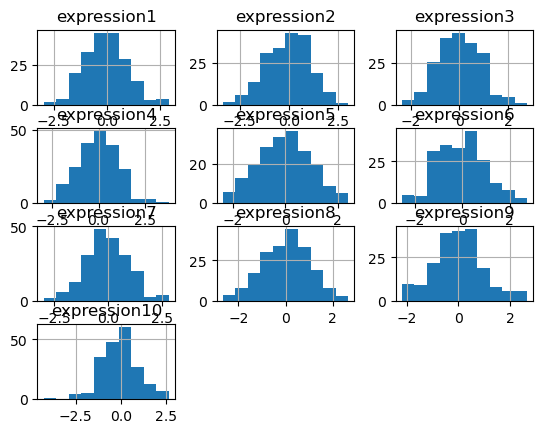

In [6]:
hist = df.hist(bins=10)

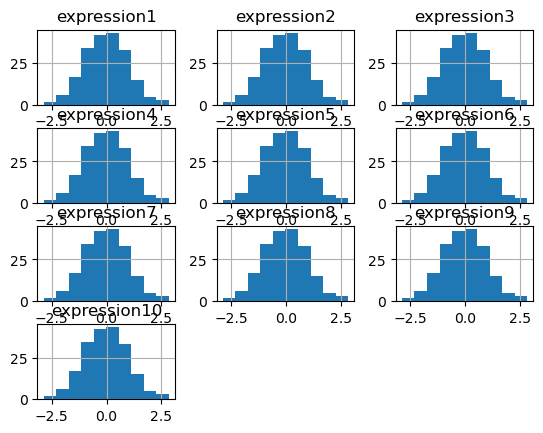

In [7]:
hist = quant_norm_df.hist(bins=10)

# VIOLIN PLOT

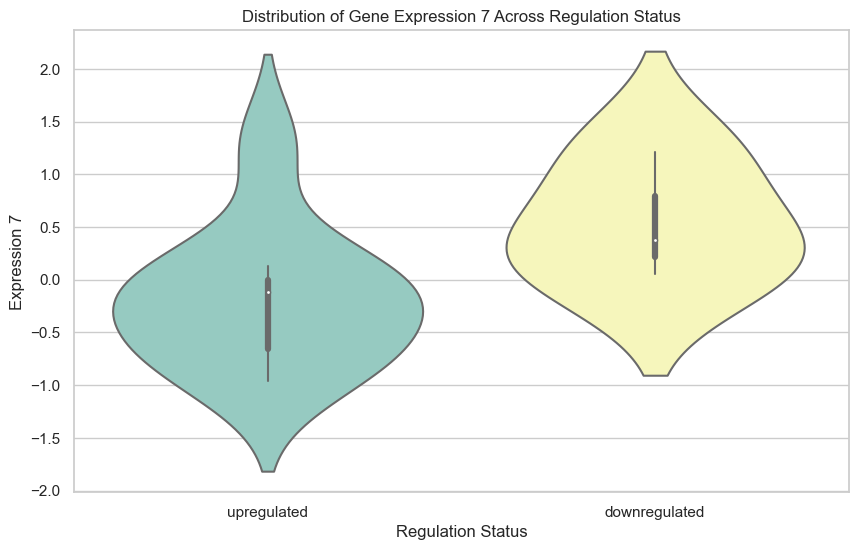

In [39]:
# Example

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    "Gene": ["Gene1", "Gene2", "Gene3", "Gene4", "Gene5", "Gene6", "Gene7", "Gene8", "Gene9", "Gene10", "Gene11", "Gene12"],
    "expression1": [-0.858173142, -0.130802861, 1.469135092, -0.371510367, 0.948211082, -0.412843521, -0.492371929, -0.044663508, -1.148062988, 0.572425379, -1.927788935, -0.219797868],
    "expression2": [-0.139079711, 0.480757259, -0.815659759, -0.106366347, -0.180797722, 2.049369458, 1.840617208, 0.409185659, 0.996546505, 0.576344803, -1.343362095, -1.164599818],
    "expression3": [0.865472633, -0.428382284, -0.617188035, -0.897941051, -0.54000591, 0.724688999, -1.163624865, -0.779400227, 1.016520678, -1.89803182, 0.298833662, -0.577994541],
    "expression4": [3.803808114, 1.051824781, 0.145182775, 1.214045585, -0.069251344, -0.392992976, -2.966354925, -1.387229146, -0.950141559, 0.378990747, -0.652201828, -1.03195977],
    "expression5": [-0.115127678, -0.053146017, -0.503168403, -1.730614251, -0.997641286, 1.682256296, -0.726920357, 0.476472188, 0.845577264, 1.141983521, 0.711940678, 0.976579134],
    "expression6": [-0.340275341, 0.18660836, 0.331523649, -0.548624701, -0.473587463, -1.024004612, 1.426733577, 0.338502387, 0.211329592, 0.803254922, 0.391868374, -0.322910591],
    "expression7": [0.130010082, -0.759487293, -0.055051452, -0.462933753, -0.657948564, -0.958823631, 1.281547243, -0.119483472, 0.001806475, 0.376866991, 1.209236439, 0.052356992],
    "expression8": [-1.37280277, -0.551481657, -0.934694481, 0.815689103, -0.654580912, 1.147021506, 0.444467371, 0.051543425, 1.307545558, -0.690101283, 1.014197038, 0.716331088],
    "expression9": [-1.095502958, 0.327199808, 0.920855377, -0.274349121, -0.930108768, 0.642151338, -1.214802378, 2.239130435, -1.458265022, 0.152769391, -0.814924231, -1.461715541],
    "expression10": [-0.851938438, -0.359877991, 0.077509177, -0.139258047, 0.387637345, -0.865358316, 1.21698295, -0.098942319, -0.892685882, -1.039319335, -0.777758769, 0.919840829],
    "Regulation_status": ["upregulated", "upregulated", "upregulated", "upregulated", "upregulated", "upregulated", "upregulated", "upregulated", "upregulated", "downregulated", "downregulated", "downregulated"]
}

df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Regulation_status", y="expression7", data=df, palette="Set3")

# Add labels and title
plt.xlabel("Regulation Status")
plt.ylabel("Expression 7")
plt.title("Distribution of Gene Expression 7 Across Regulation Status")

# Save the plot as a PNG file
plt.savefig("violin_plot.png")

# Show the plot
plt.show()

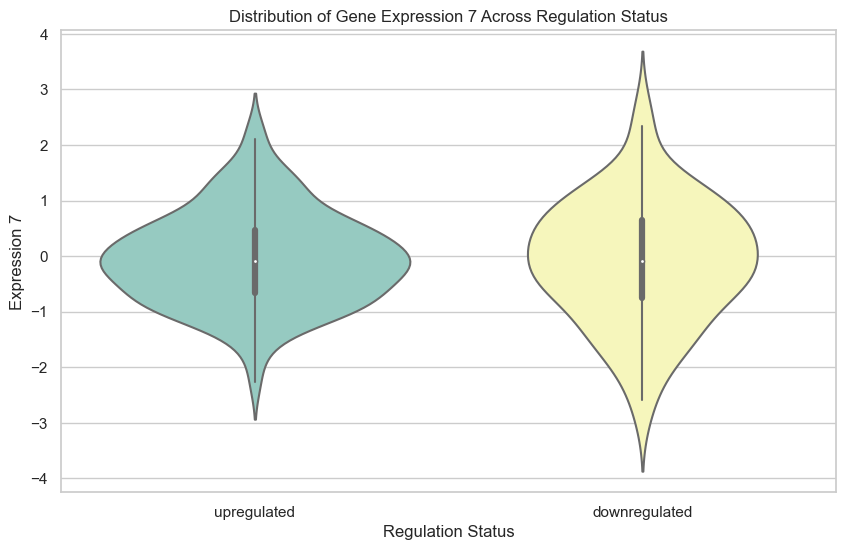

In [42]:
# actual data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the first file
data_path = "TIS_raw_input1.txt"
data_df = pd.read_csv(data_path, delimiter="\t")

# Read the second file
regulation_path = "TIS_raw_input2_regulation_status.txt"
regulation_df = pd.read_csv(regulation_path, delimiter="\t")

# Merge the two dataframes based on the "Gene" column
merged_df = pd.merge(data_df, regulation_df, on="Gene")

# Set style
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Regulation_status", y="expression7", data=merged_df, palette="Set3")

# Add labels and title
plt.xlabel("Regulation Status")
plt.ylabel("Expression 7")
plt.title("Distribution of Gene Expression 7 Across Regulation Status")

# Save the plot as a PNG file
plt.savefig("violin_plot.png")

# Show the plot
plt.show()